## Impor Modul

In [1]:
import processor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
berkas = ['IMDb_movies.csv', 'IMDb_ratings.csv']
movies = {}
for isi in berkas:
    movies[isi] = processor.read_data(isi, sep=',')
movies

{'IMDb_movies.csv':       imdb_title_id                                              title  \
 0         tt0000574                        The Story of the Kelly Gang   
 1         tt0001892                                     Den sorte drøm   
 2         tt0002101                                          Cleopatra   
 3         tt0002130                                          L'Inferno   
 4         tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
 ...             ...                                                ...   
 81268     tt9903716                                             Jessie   
 81269     tt9905412                                              Ottam   
 81270     tt9905462                                          Pengalila   
 81271     tt9911774                          Padmavyuhathile Abhimanyu   
 81272     tt9914286                                  Sokagin Çocuklari   
 
                                           original_title  year date_published 

In [3]:
data_ratings = movies['IMDb_ratings.csv']
data_ratings

imdb_title_id  weighted_average_vote  total_votes  mean_vote  \
0         tt0000574                    6.1          537        6.3   
1         tt0001892                    5.9          171        6.1   
2         tt0002101                    5.2          420        5.2   
3         tt0002130                    7.0         2019        6.9   
4         tt0002199                    5.7          438        5.8   
...             ...                    ...          ...        ...   
81268     tt9903716                    7.2          219        8.1   
81269     tt9905412                    7.8          510        7.8   
81270     tt9905462                    8.4          604        8.1   
81271     tt9911774                    8.4          369        8.2   
81272     tt9914286                    7.2          190        9.5   

       median_vote  votes_10  votes_9  votes_8  votes_7  votes_6  ...  \
0              6.0        54       17       55      121      122  ...   
1              6.0         5        6       17       41       52  ...   
2              5.0        12        8       16       60       89  ...   
3              7.0       194      208      386      571      308  ...   
4              6.0        28       15       42       75      114  ...   
...            ...       ...      ...      ...      ...      ...  ...   
81268          9.0        86       37       33       15       17  ...   
81269          9.0       184       80       91       39       10  ...   
81270          9.0       280       80      101       31        9  ...   
81271          9.0       111       74       74       61       30  ...   
81272         10.0       177        0        2        0        0  ...   

       females_30age_avg_vote  females_30age_votes  females_45age_avg_vote  \
0                         6.0                 19.0                     6.6   
1                         5.8                  4.0                     6.5   
2                         5.5                 14.0                     6.2   
3                         7.3                 74.0                     7.4   
4                         4.8                 10.0                     6.5   
...                       ...                  ...                     ...   
81268                     5.6                  6.0                     6.7   
81269                     NaN                  NaN                     NaN   
81270                     NaN                  NaN                     NaN   
81271                     NaN                  NaN                     NaN   
81272                     NaN                  NaN                     NaN   

       females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
0                     14.0                    6.3                  64.0   
1                      8.0                    5.9                  29.0   
2                     20.0                    4.9                  57.0   
3                     75.0                    7.0                 126.0   
4                     15.0                    5.7                  56.0   
...                    ...                    ...                   ...   
81268                  3.0                    2.0                   4.0   
81269                  NaN                    1.0                   1.0   
81270                  NaN                    1.0                   1.0   
81271                  NaN                    1.0                   1.0   
81272                  NaN                    4.0                   3.0   

       us_voters_rating  us_voters_votes  non_us_voters_rating  \
0                   6.0             89.0                   6.2   
1                   6.2             27.0                   6.0   
2                   5.5            197.0                   4.7   
3                   7.1            452.0                   7.0   
4                   5.9            161.0                   5.7   
...                 ...              ...              

In [14]:
age = [0,18,30,45] ; sex = ['males','females']
males = [] ; females = []
for i in age:
    for j in sex:
        X = f'{j}_{i}age_votes'
        new = data_ratings.dropna(subset=[X])
        if j == 'males':
            males.append(np.sum(new[X]))
        else:
            females.append(np.sum(new[X]))
print(males)
print(females)

[421034.0, 128659395.0, 259025907.0, 79387618.0]
[131922.0, 39722168.0, 51086304.0, 14536234.0]


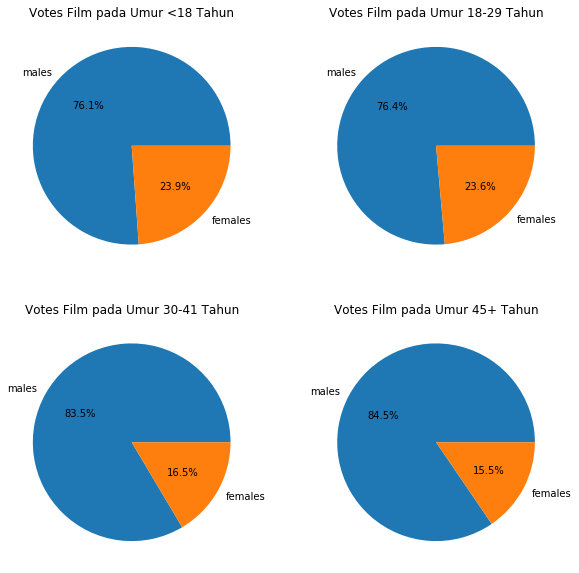

In [19]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sub = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
for i in range(len(sub)):
    if i == 0:
        processor.generate_pie_sub([males[i],females[i]],['males','females'],f'Votes Film pada Umur <18 Tahun',sub[i])
    elif 0 < i < 3:
        processor.generate_pie_sub([males[i],females[i]],['males','females'],f'Votes Film pada Umur {age[i]}-{age[i]+11} Tahun',sub[i])
    else:
        processor.generate_pie_sub([males[i],females[i]],['males','females'],f'Votes Film pada Umur {age[i]}+ Tahun',sub[i])

Dari grafik diatas dapat disimpulkan rata rata penggemar dan peminat film adalah laki laki

In [6]:
Y = data_ratings[['imdb_title_id','weighted_average_vote']].groupby('weighted_average_vote').count()
Y

imdb_title_id
weighted_average_vote               
1.0                               19
1.1                               16
1.2                               23
1.3                               17
1.4                               26
...                              ...
9.5                                3
9.6                                2
9.7                                1
9.8                                1
10.0                               2

[90 rows x 1 columns]

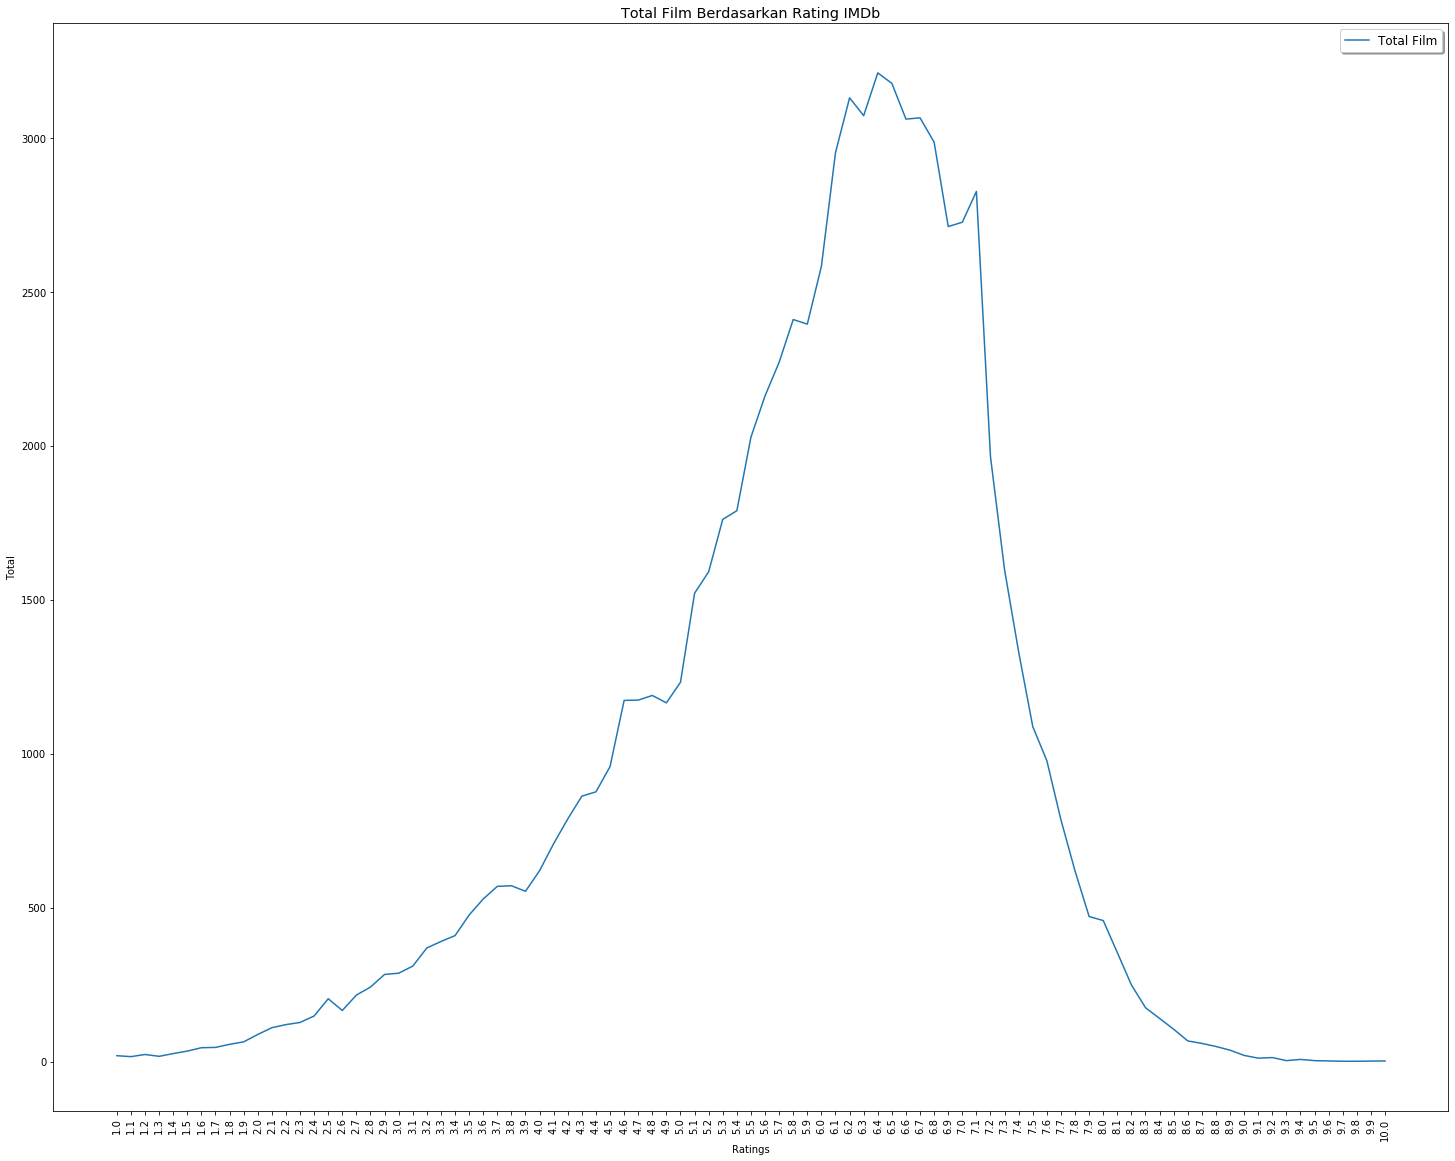

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(25,20))
plt.plot(Y.index,list(Y['imdb_title_id']), label='Total Film')
plt.title('Total Film Berdasarkan Rating IMDb', fontsize='x-large')
plt.xlabel('Ratings') ; plt.xticks(np.arange(1.0, 10.1, 0.1), rotation=90)
plt.ylabel('Total')
plt.legend(shadow=True, fontsize='large')
plt.show()
plt.clf()

Dari grafik diatas dapat disimpulkan bahwa rating dari film terbanyak yaitu sebesar 6.4

In [8]:
age = [0,18,30,45] ; sex = ['males','females'] ; new_total = []
for x in age:
    total = 0
    for y in sex:
        z = f'{y}_{x}age_votes'
        a = data_ratings.dropna(subset=[z])
        total += np.sum(a[z])
    new_total.append(total)
new_total

[552956.0, 168381563.0, 310112211.0, 93923852.0]

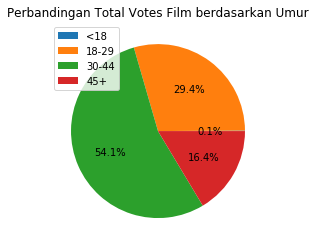

<Figure size 432x288 with 0 Axes>

In [11]:
processor.generate_pie(new_total,['<18','18-29','30-44','45+'],'Perbandingan Total Votes Film berdasarkan Umur')

Dari grafik diatas diketahui votes terbanyak dimiliki oleh peminat film pada rentang umur 30-44 tahun